In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]

In [9]:
sesh = pd.read_csv('training_set/log_mini.csv')
tracks = pd.read_csv('track_features/tf_mini.csv')

In [10]:
unq_sesh = sesh.drop_duplicates(subset='session_id')

In [11]:
unq_sesh.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,10000.0,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000
mean,1.0,16.788000,0.0,0.0,0.0,0.0,0.175100,0.144400,14.202800
std,0.0,3.808321,0.0,0.0,0.0,0.0,0.528079,0.855232,5.875281
min,1.0,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.0,13.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,11.000000
50%,1.0,20.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,15.000000
75%,1.0,20.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,19.000000
max,1.0,20.000000,0.0,0.0,0.0,0.0,22.000000,53.000000,23.000000


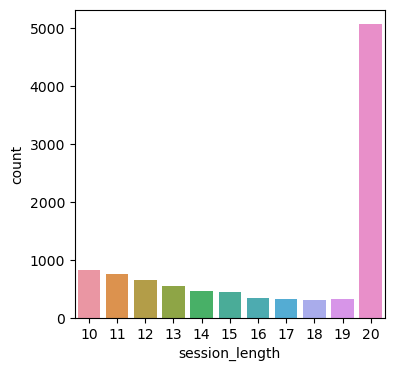

In [12]:
ax = sns.countplot(x="session_length",data=unq_sesh)

In [13]:
sesh.rename(columns={'track_id_clean':'track_id'},inplace=True)

In [14]:
df = sesh.merge(tracks, how='left', on='track_id')

In [7]:
df.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'duration', 'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object

In [74]:
random_session_id = np.random.choice(df.session_id.unique(), 1)


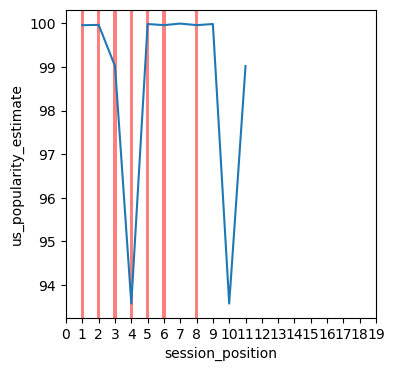

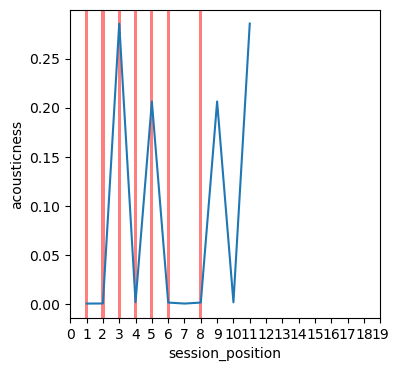

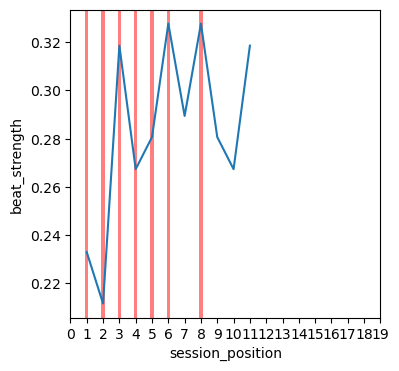

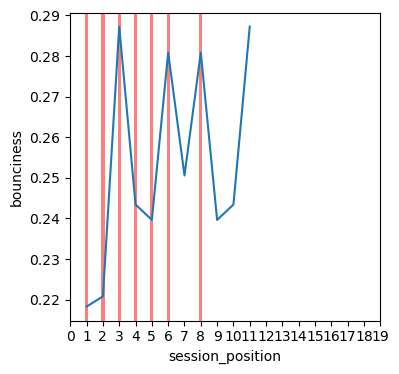

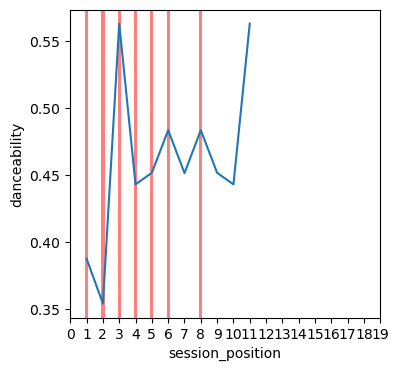

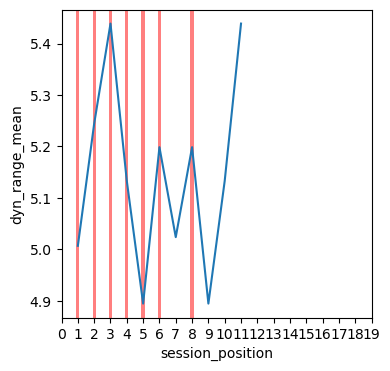

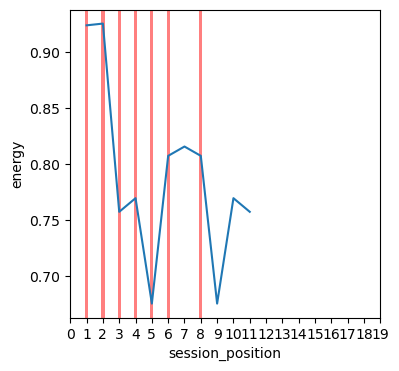

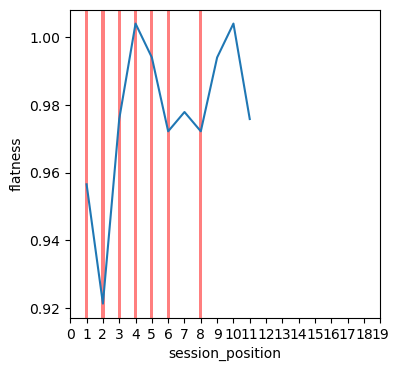

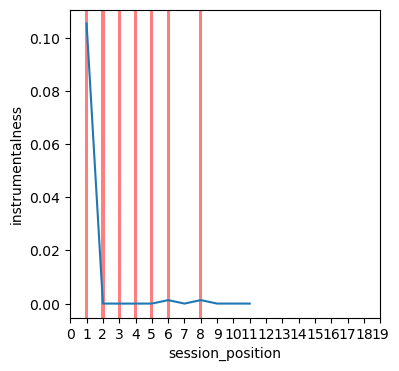

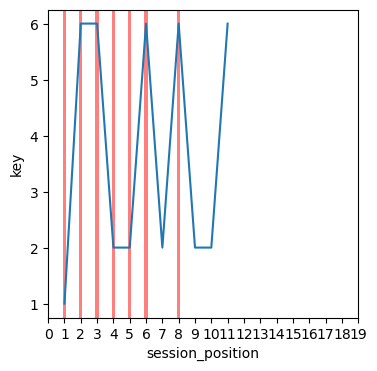

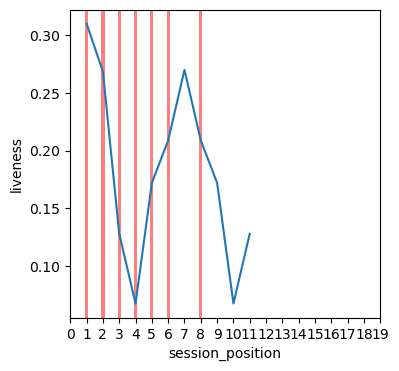

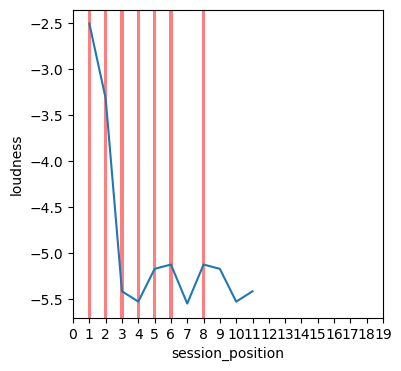

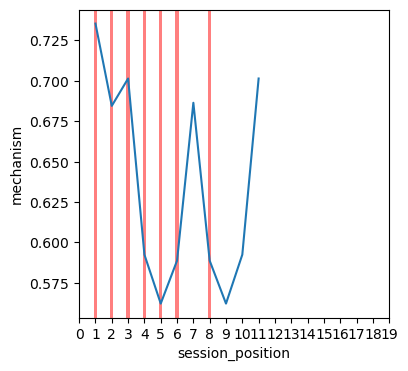

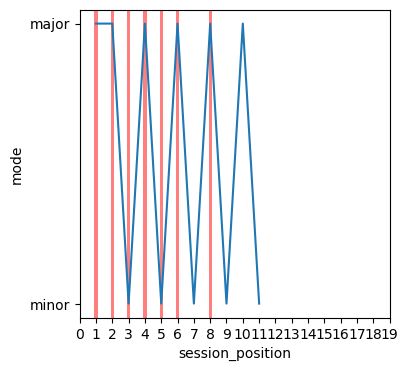

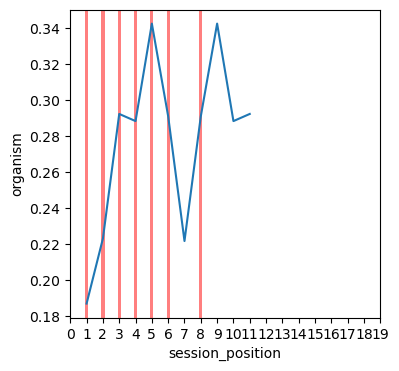

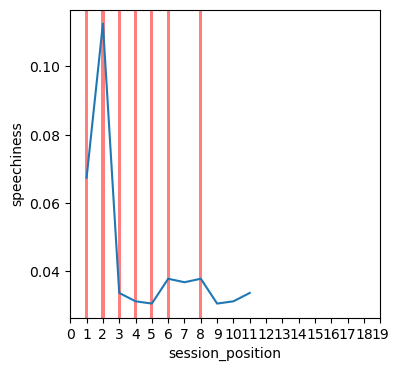

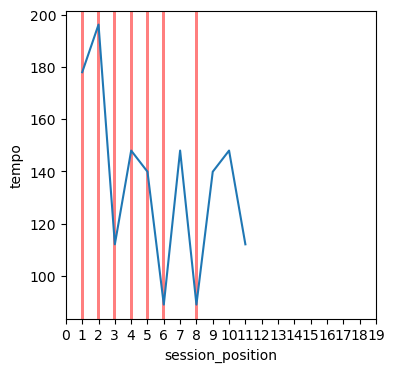

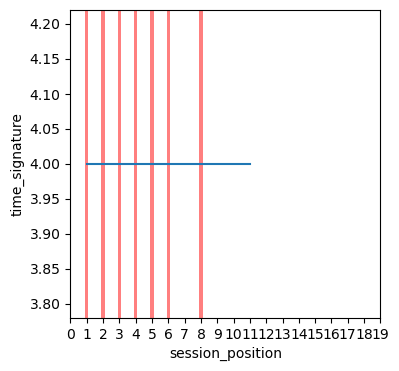

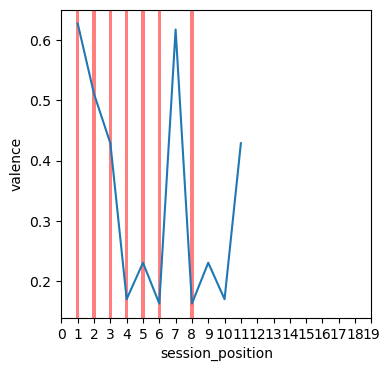

In [75]:
%matplotlib inline

# properties = ['us_popularity_estimate', 'acousticness',
#        'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
#        'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
#        'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
#        'time_signature', 'valence']
properties = ['us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence']
acoustic_features = ['acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7']
songs_of_a_session = df[df.session_id.isin(random_session_id)][properties + acoustic_features + ['session_position', 'skip_2']]
skipped  = songs_of_a_session['skip_2'].to_list()
skipidx = [i for i, x in enumerate(skipped) if x]
skipidx = np.array(skipidx)
for property in properties:
	sns.lineplot(x="session_position", y=property, data=songs_of_a_session)
	# sns.lineplot(x="session_position", y='skip_2', data=songs_of_a_session)
	for idx in skipidx:
		plt.axvspan(idx - 0.1, idx+ 0.1, facecolor='r', alpha=0.5)
	plt.xticks(range(0,20,1))
	plt.ylabel(property)
	plt.show()



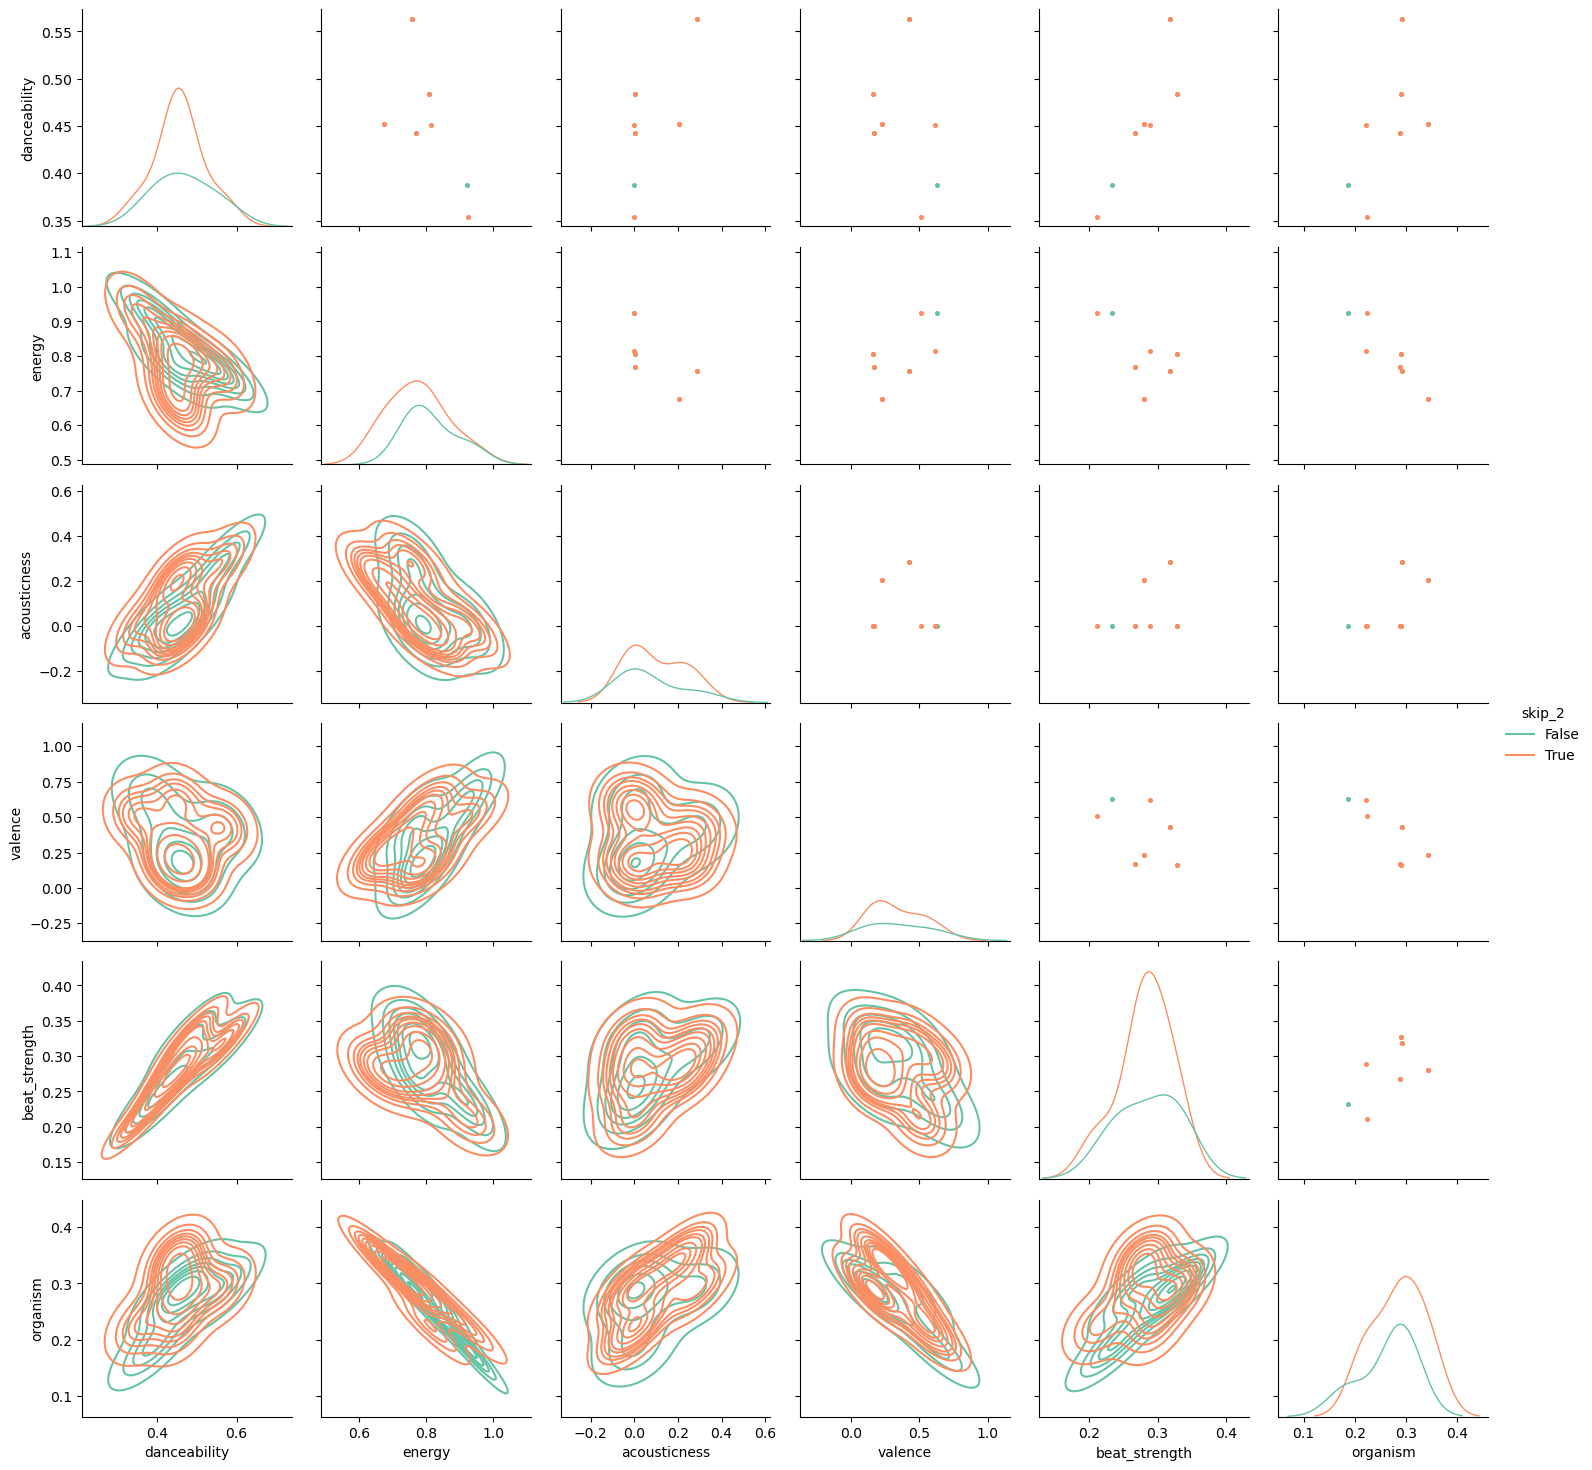

In [76]:
features = ['danceability', 'energy', 'acousticness', 'valence', 'session_id', 'skip_2', 'mode', 'beat_strength', 'organism']
g = sns.PairGrid(df[df.session_id.isin(random_session_id)][features], hue='skip_2', palette='Set2')
g.map_upper(plt.scatter, s=7)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=1)
g.add_legend();

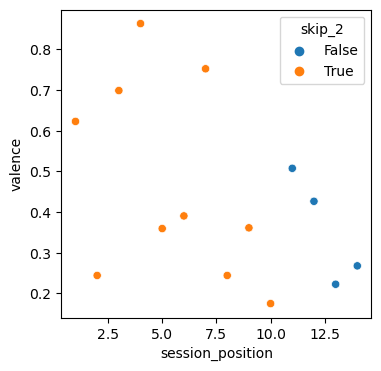

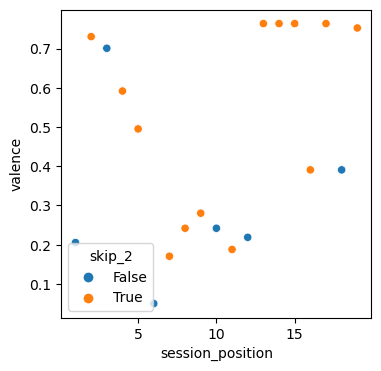

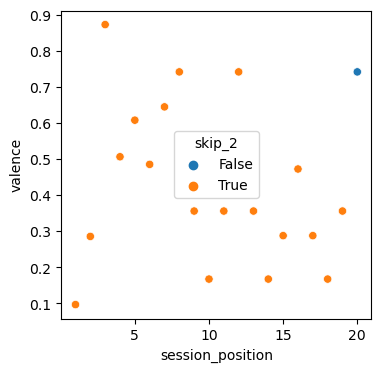

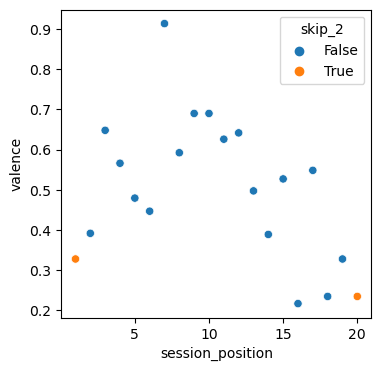

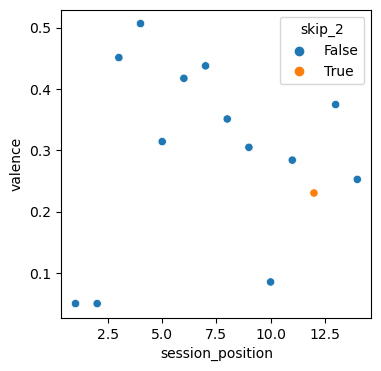

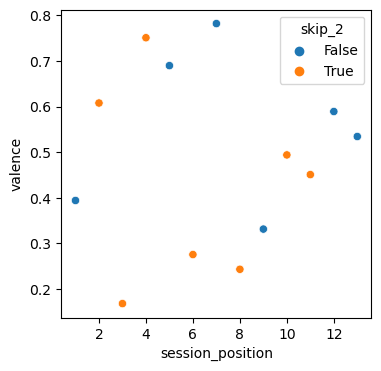

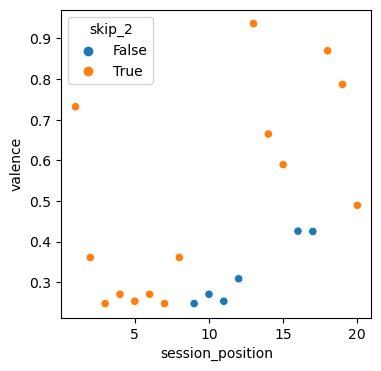

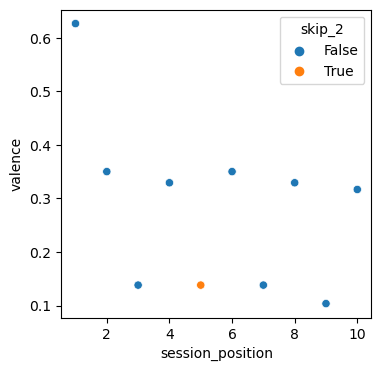

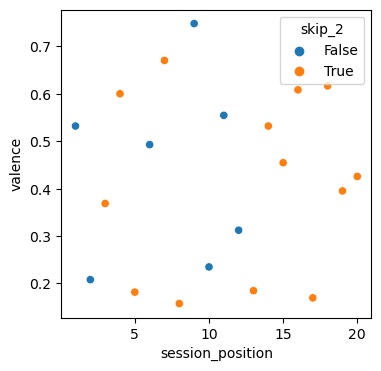

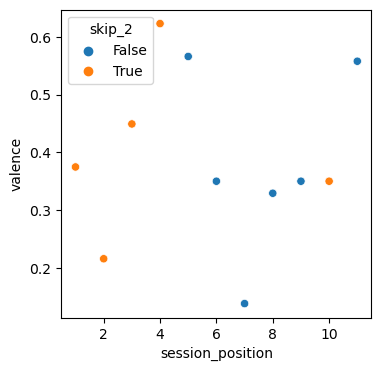

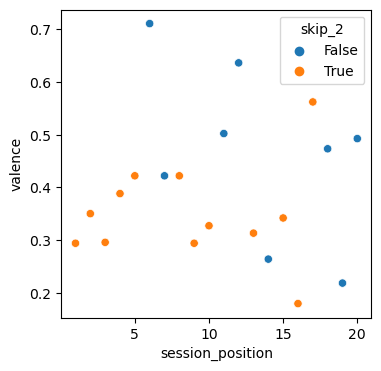

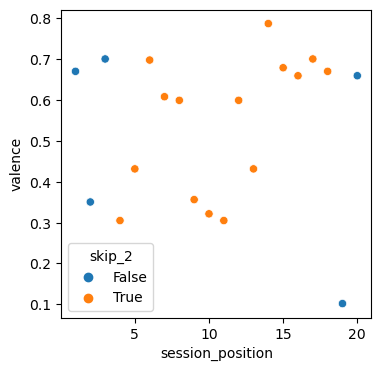

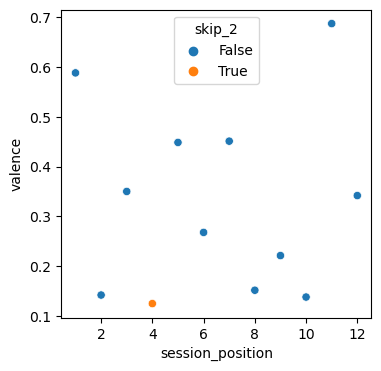

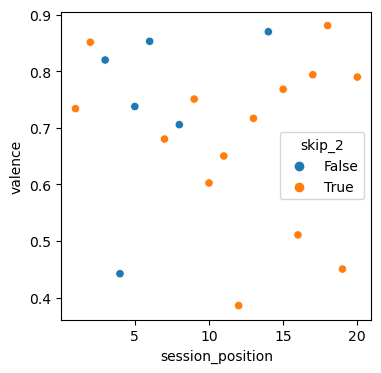

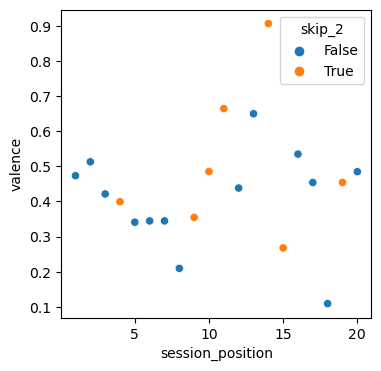

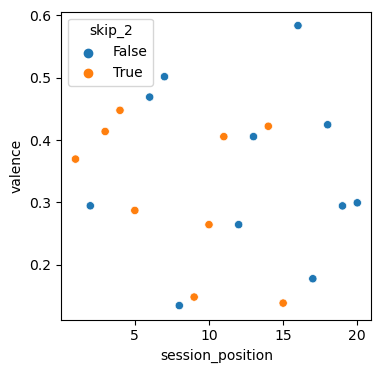

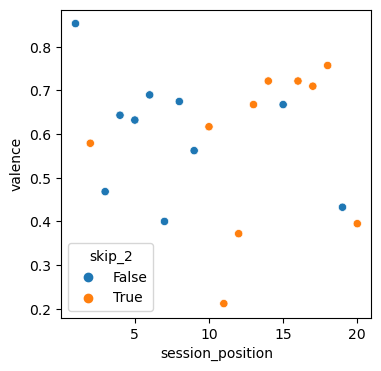

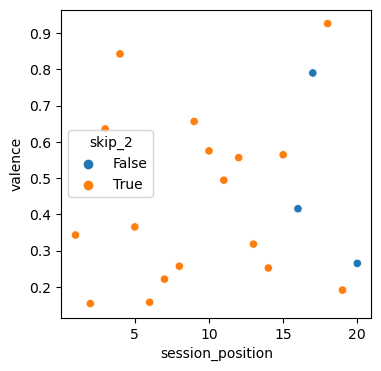

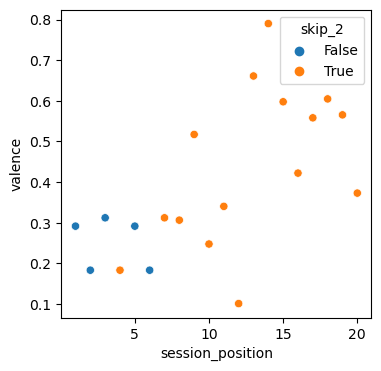

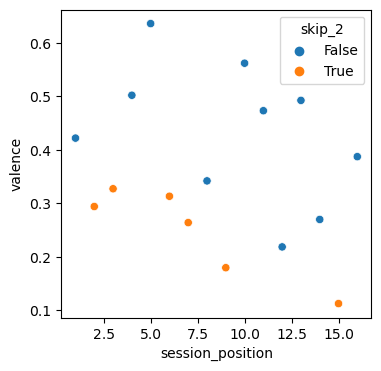

In [82]:
%matplotlib inline
random_sessions = np.random.choice(df.session_id.unique(), 20)
# property = 'us_popularity_estimate'
# property = 'acousticness'
# property = 'beat_strength'
# property = 'bounciness'
# property = 'danceability'
# property = 'dyn_range_mean'
# property = 'energy'
# property = 'flatness'
# property = 'instrumentalness'
# property = 'key'
# property = 'liveness'
# property = 'loudness'
# property = 'mechanism'
# property = 'mode'
# property = 'organism'
# property = 'speechiness'
# property = 'tempo'
# property = 'time_signature'
property = 'valence'
# property = 'acoustic_vector_0'
# property = 'acoustic_vector_1'
# property = 'acoustic_vector_2'
# property = 'acoustic_vector_3'
# property = 'acoustic_vector_4'
# property = 'acoustic_vector_5'
# property = 'acoustic_vector_6'
# property = 'acoustic_vector_7'
songs_of_random_sessions = df[df.session_id.isin(random_sessions)][['session_id', 'session_position','skip_2', property]]
grouped = songs_of_random_sessions.groupby('session_id')
for session_id, group in grouped:
	# sns.lineplot(x="session_position", y=property, data=group)
	sns.scatterplot(x='session_position', y=property, hue='skip_2', data=group)
	# for idx in skipidx:
	# 	plt.axvspan(idx - 0.1, idx+ 0.1, facecolor='r', alpha=0.3)
	# plt.xticks(range(0,20,1))
	plt.ylabel(property)
	plt.show()


In [ ]:
%matplotlib inline
random_sessions = np.random.choice(df.session_id.unique(), 20)
# property = 'us_popularity_estimate'
# property = 'acousticness'
# property = 'beat_strength'
# property = 'bounciness'
# property = 'danceability'
# property = 'dyn_range_mean'
# property = 'energy'
# property = 'flatness'
# property = 'instrumentalness'
# property = 'key'
# property = 'liveness'
# property = 'loudness'
# property = 'mechanism'
# property = 'mode'
# property = 'organism'
# property = 'speechiness'
# property = 'tempo'
# property = 'time_signature'
# property = 'valence'
property = 'acoustic_vector_0'
# property = 'acoustic_vector_1'
# property = 'acoustic_vector_2'
# property = 'acoustic_vector_3'
# property = 'acoustic_vector_4'
# property = 'acoustic_vector_5'
# property = 'acoustic_vector_6'
# property = 'acoustic_vector_7'
# property2 = 'valence'
songs_of_random_sessions = df[df.session_id.isin(random_sessions)][['session_id', 'session_position','skip_3', property]]
grouped = songs_of_random_sessions.groupby('session_id')
for session_id, group in grouped:
	# sns.lineplot(x="session_position", y=property, data=group)
	# sns.scatterplot(x=property2, y=property, hue='skip_3', data=group)
	sns.scatterplot(x="session_position", y=property, hue='skip_3', data=group)

	# for idx in skipidx:
	# 	plt.axvspan(idx - 0.1, idx+ 0.1, facecolor='r', alpha=0.3)
	# plt.xticks(range(0,20,1))
	plt.ylabel(property)
	plt.show()


## Trying TSNE on acoustic Vectors

In [84]:

from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  
import numpy as np

/home/commander/miniconda3/envs/slam/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/commander/miniconda3/envs/slam/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 0.168573
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.308243
[t-SNE] KL divergence after 1000 iterations: 0.191093


[Text(0.5, 1.0, 'T-SNE on Acoustic Vector')]

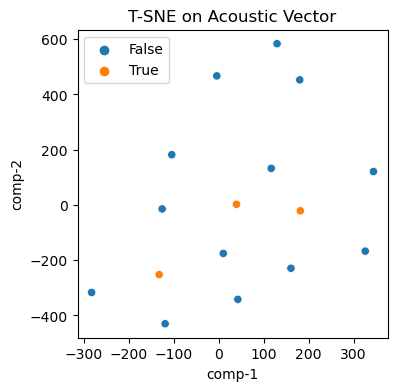

In [87]:
%matplotlib inline
acoustic_features_skip_2 = ['acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7', 'skip_2']
# random_session_id = np.random.choice(df.session_id.unique(), 1)
songs_of_a_session = df[df.session_id.isin(random_session_id)][acoustic_features_skip_2]
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=10)
z = tsne.fit_transform(songs_of_a_session[acoustic_features_skip_2[:-1]], songs_of_a_session['skip_2'])
xdf = pd.DataFrame()
xdf["y"] = songs_of_a_session['skip_2']
xdf["comp-1"] = z[:,0]
xdf["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=xdf.y.tolist(),
                data=xdf).set(title="T-SNE on Acoustic Vector") 

/home/commander/miniconda3/envs/slam/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/commander/miniconda3/envs/slam/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.138s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 29.688291
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.990250
[t-SNE] KL divergence after 1000 iterations: 0.100810


[Text(0.5, 1.0, 'T-SNE on Acoustic Features')]

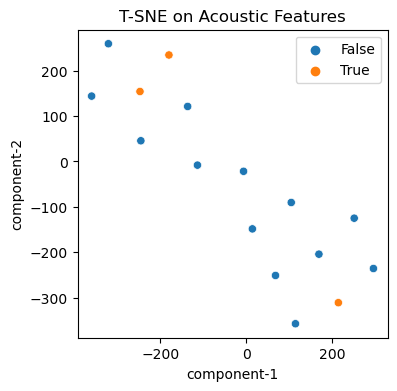

In [85]:
random_session_id = np.random.choice(df.session_id.unique(), 1)
properties_skip_2 = ['us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'liveness', 'loudness',
       'mechanism', 'key', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'skip_2']
songs_of_a_session = df[df.session_id.isin(random_session_id)][properties_skip_2]
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=9)
z2 = tsne.fit_transform(songs_of_a_session[properties_skip_2[:-1]], songs_of_a_session['skip_2'])
xdf = pd.DataFrame()
xdf["y"] = songs_of_a_session['skip_2']
xdf["component-1"] = z2[:,0]
xdf["component-2"] = z2[:,1]
sns.scatterplot(x="component-1", y="component-2", hue=xdf.y.tolist(),data=xdf).set(title="T-SNE on Acoustic Features") 

## Correlation matrix of Acoustic vectors
Commentary

Text(95.72222222222221, 0.5, '')

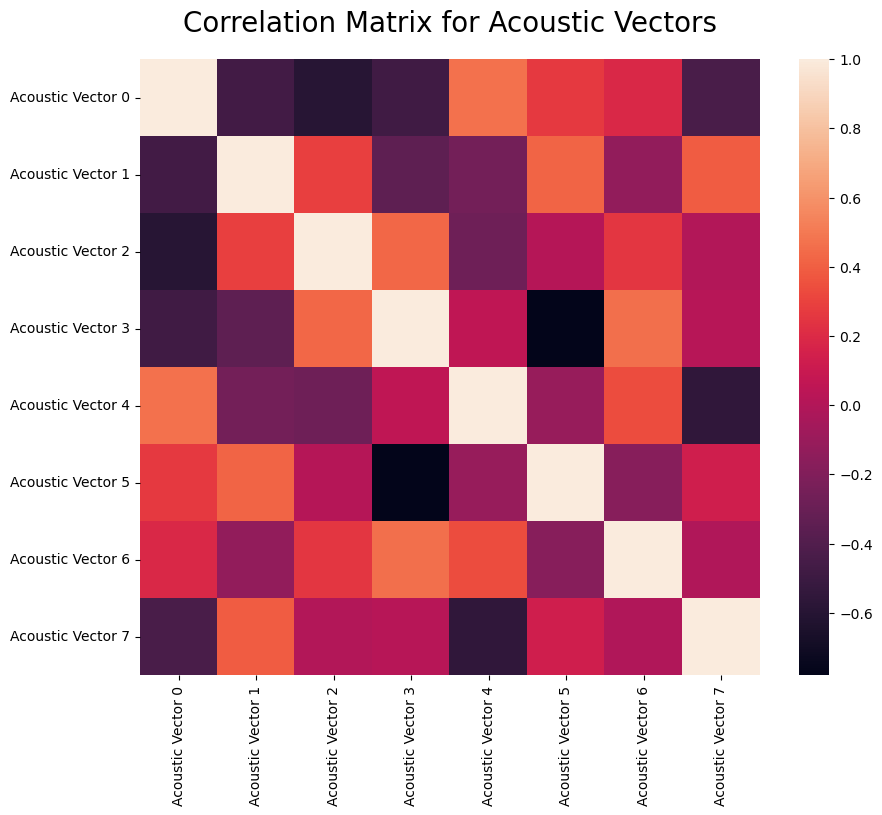

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(
    tracks[[
        "acoustic_vector_0",
        "acoustic_vector_1",
        "acoustic_vector_2",
        "acoustic_vector_3",
        "acoustic_vector_4",
        "acoustic_vector_5",
        "acoustic_vector_6",
        "acoustic_vector_7"
    ]].rename(
        columns={f"acoustic_vector_{i}":f"Acoustic Vector {i}" for i in range(8)}
    ).corr()
)
plt.title(
    "Correlation Matrix for Acoustic Vectors",
    fontsize=20,
    pad=20
)
plt.xlabel("")
plt.ylabel("")

### Skipping Spree Lengths

In [88]:
from collections import defaultdict
skip_spree_dict = {}
skip_spree_list = []
for i in range(0, 40):
	skip_spree_dict[i] = 0
skip_spree_len = 0
# print(skip_spree_dict)
for index, row in df.iterrows():
	if row['skip_2'] == 1:
		skip_spree_len += 1
	else:
		skip_spree_dict[skip_spree_len] += 1
		if skip_spree_len > 0:
			if skip_spree_len > 20:
				skip_spree_len = 20
			skip_spree_list.append(skip_spree_len)
		skip_spree_len = 0


Text(0, 0.5, 'Number of skipping sprees')

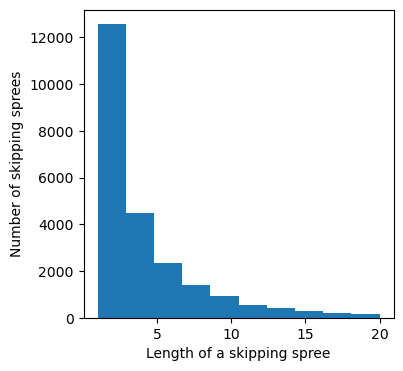

In [92]:
plt.hist(skip_spree_list)
plt.xlabel('Length of a skipping spree')
plt.ylabel('Number of skipping sprees')

### Plotting Skipping rate by session position
Only the tracks in the 2nd half of each session are plotted as those would be the tracks for machine learning prediction.

In [94]:
log_df_2ndHalf = sesh[sesh['session_position']>sesh['session_length']/2]
skip_by_position = pd.DataFrame(log_df_2ndHalf.groupby(['session_position'])['skip_2'].mean())


In [34]:
skip_by_position.T

session_position,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
skip_2,0.525143,0.509407,0.500547,0.470234,0.461086,0.507897,0.529482,0.52923,0.534411,0.52929,0.529486,0.529902,0.532465,0.535688,0.546388


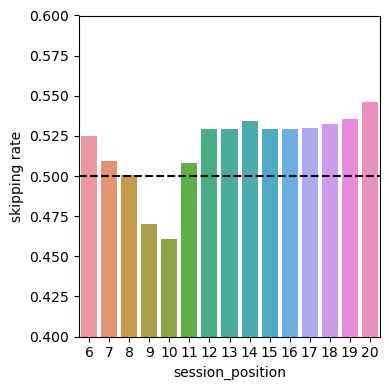

In [96]:
graph = sns.barplot(x=skip_by_position.index, y=skip_by_position['skip_2'])
ax.set_ylabel('skipping rate')
ax.set_xlabel('session position')
graph.axhline(0.5, linestyle = '--', c = 'k')
plt.ylim(0.4,0.6)
plt.tight_layout()
plt.ylabel('skipping rate')
plt.show()


0.525 for session_position 6 means, for the 6th track in a session, the skipping rate is 52.5% i.e. theres a 52.5% chance that the user will skip the track.

### Spearman Correlation Between track features

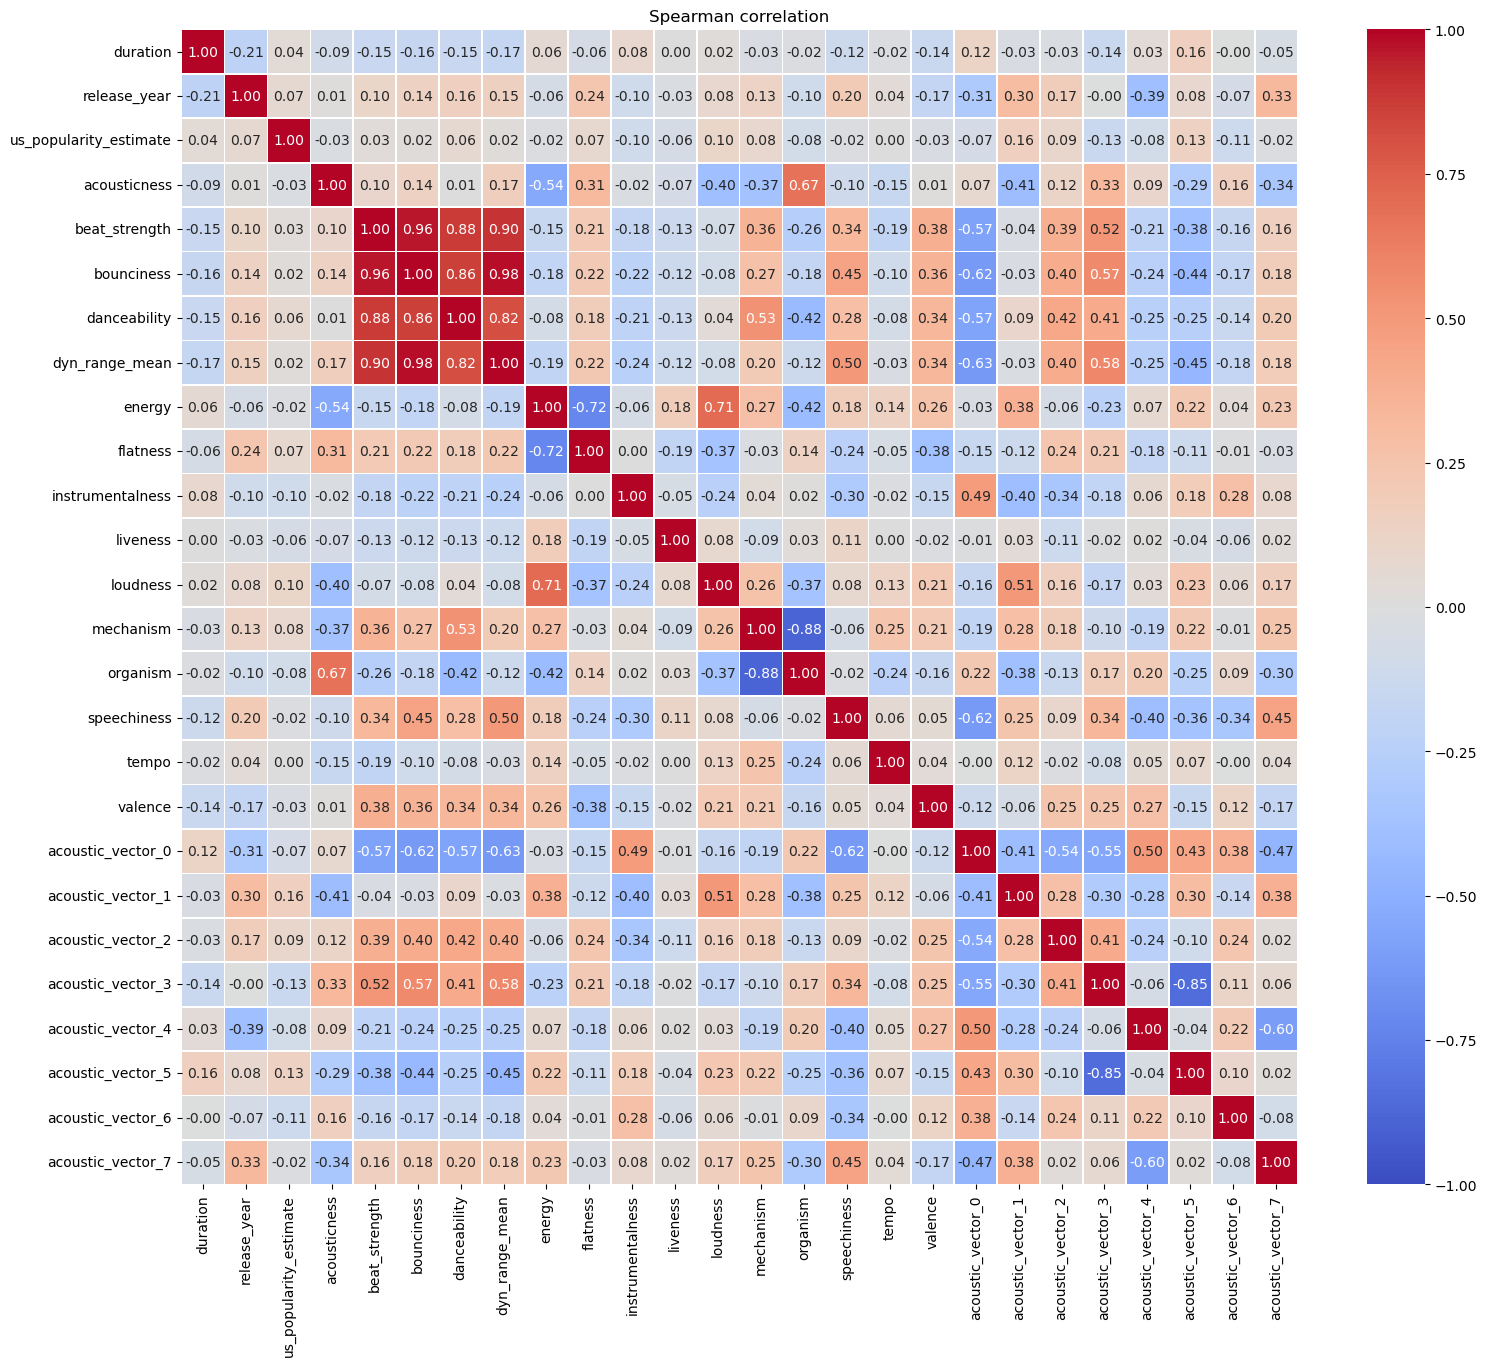

In [38]:
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap(tracks.drop(columns=['key','time_signature']).corr(method='spearman'), linewidth = 0.5 , cmap = 'coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", ax = ax)
plt.title('Spearman correlation')
plt.show()

## Is Human listening behaviour the reason for skipping?

### Sorted the top 30 columns which had the biggest differences (unsigned t-values) between skipped and non-skipped tracks

In [58]:
from scipy import stats
log_df_dummy = pd.get_dummies(sesh, columns=['hist_user_behavior_reason_start','hist_user_behavior_reason_end','context_type'])
tf_df_dummy = pd.get_dummies(tracks, columns=['key','time_signature'])
df_merge = pd.merge(log_df_dummy, tf_df_dummy, how='left', left_on='track_id', right_on = 'track_id')


dropping_columns = ['session_length','context_switch','hour_of_day','date','premium','skip_1','skip_2','skip_3','not_skipped']
df_merge_skipT = df_merge[df_merge['skip_2']==True].drop(columns = dropping_columns).groupby('session_id').mean()
df_merge_skipF = df_merge[df_merge['skip_2']==False].drop(columns = dropping_columns).groupby('session_id').mean()

df_merge_skipT.sort_index(inplace = True)
df_merge_skipF.sort_index(inplace = True)
try:
    result = stats.ttest_rel(df_merge_skipT,df_merge_skipF)
except:
    print("Variable are not paired")


sorted_tvalues = np.abs(pd.DataFrame(index = df_merge_skipT.columns, data = list(result.statistic))).sort_values(by=0, ascending=False)
sel_range = 30
sorted_tvalues = sorted_tvalues.iloc[:sel_range]

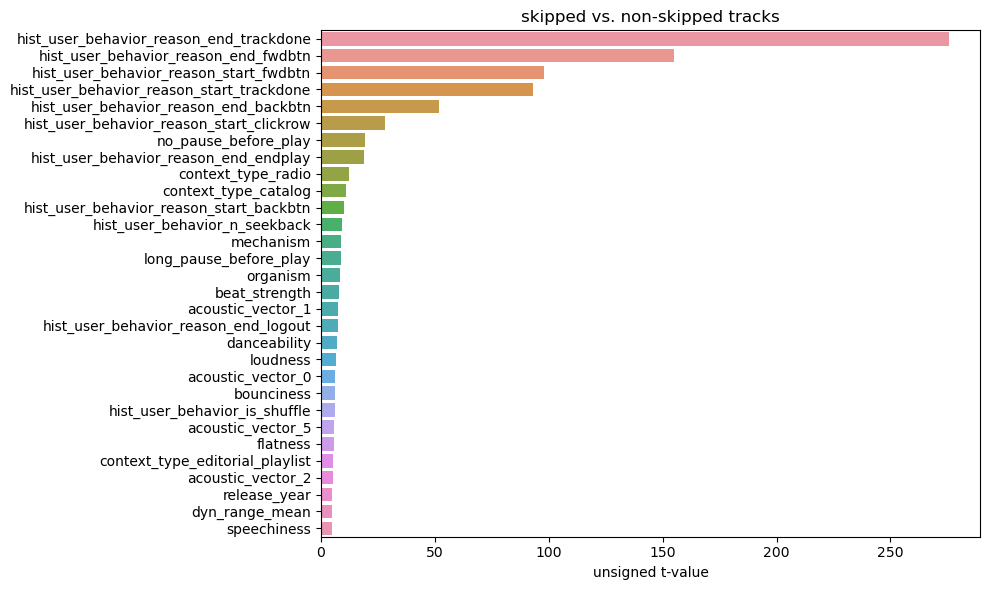

In [59]:
fig, ax = plt.subplots(figsize=(10,6)) 

graph = sns.barplot(data = sorted_tvalues.T, ax=ax, orient = 'h')
ax.set_xlabel('unsigned t-value')
plt.title('skipped vs. non-skipped tracks')
plt.tight_layout()
plt.show()

It appeared that the **listening behaviors (reasons to start and end) are closely associated with the skipping behavior.** Would it be a circular reasoning that a track was skipped because the user had a reason to skip it? Possible! But it could be a good predictor too, as a user might want to keep skipping tracks as he/she is looking for something specific.

Another interesting observation is that the **track features had relatively low associations with the skipping behavior.** It makes sense as skip_2 means the users skip a track after only listening for a brief period. However, the track features were obtained by analyzing the entire track. Therefore, such information has not been perceived by the users at the moment they skip it.

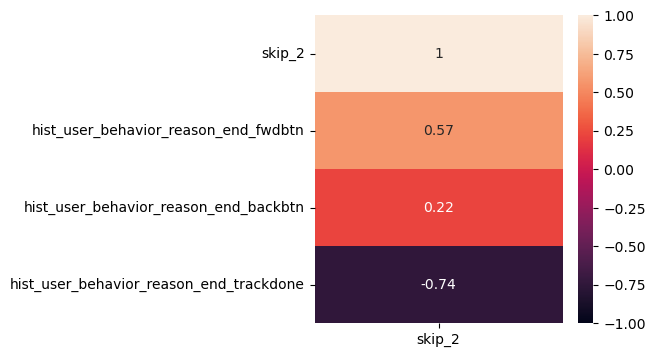

In [132]:
df['hist_user_behavior_reason_end_trackdone'] = np.where(df['hist_user_behavior_reason_end'] == 'trackdone', 1, 0)
df['hist_user_behavior_reason_end_fwdbtn'] = np.where(df['hist_user_behavior_reason_end'] == 'fwdbtn', 1, 0)
df['hist_user_behavior_reason_end_backbtn'] = np.where(df['hist_user_behavior_reason_end'] == 'backbtn', 1, 0)
df['hist_user_behavior_reason_start_trackdone'] = np.where(df['hist_user_behavior_reason_start'] == 'trackdone', 1, 0)
df['hist_user_behavior_reason_start_fwdbtn'] = np.where(df['hist_user_behavior_reason_start'] == 'fwdbtn', 1, 0)
df['hist_user_behavior_reason_start_backbtn'] = np.where(df['hist_user_behavior_reason_start'] == 'backbtn', 1, 0)
heatmap = sns.heatmap(df[['skip_2', 
                          'hist_user_behavior_reason_end_trackdone',
                          'hist_user_behavior_reason_end_backbtn',
                          'hist_user_behavior_reason_end_fwdbtn']].corr()[['skip_2']].sort_values(by='skip_2', ascending=False), 
                      vmin=-1, vmax=1, annot=True)

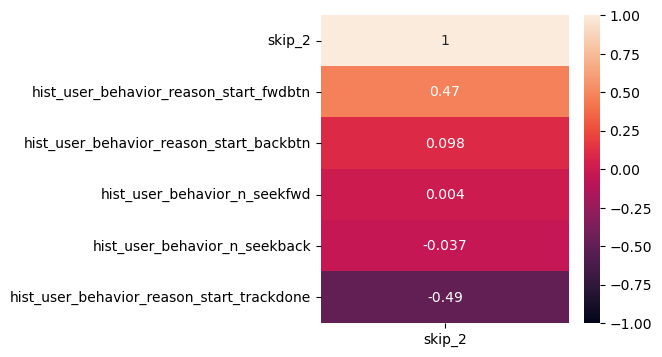

In [135]:
heatmap = sns.heatmap(df[['skip_2', 
                          'hist_user_behavior_n_seekfwd',
                          'hist_user_behavior_n_seekback',
                          'hist_user_behavior_reason_start_fwdbtn',
                          'hist_user_behavior_reason_start_trackdone',
                          'hist_user_behavior_reason_start_backbtn']].corr()[['skip_2']].sort_values(by='skip_2', ascending=False), 
                      vmin=-1, vmax=1, annot=True)

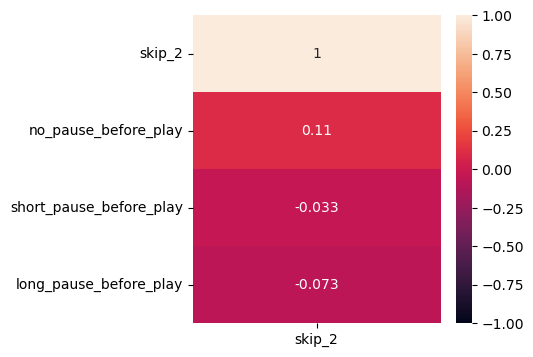

In [175]:
heatmap = sns.heatmap(df[['skip_2', 
                          'no_pause_before_play',
                          'short_pause_before_play',
                          'long_pause_before_play',
                          ]].corr()[['skip_2']].sort_values(by='skip_2', ascending=False), 
                      vmin=-1, vmax=1, annot=True)

### Does time of the day affect skipping behaviour?

Text(0.5, 1.0, 'Number of sessions per hour of day')

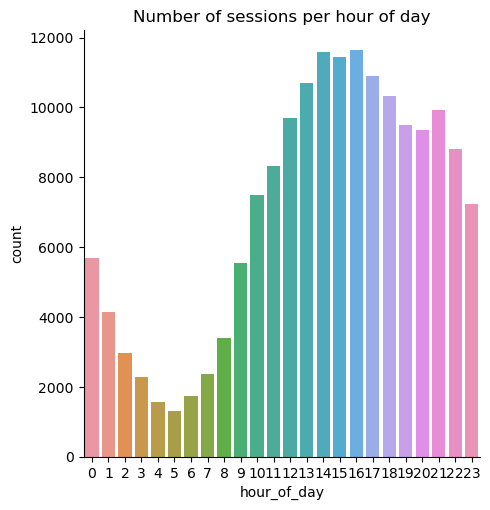

In [174]:
sns.catplot(x='hour_of_day', kind='count', data=df)
plt.title('Number of sessions per hour of day')

In [99]:
skipped_by_hour = df[df['skip_2'] == 1]['hour_of_day'].value_counts().to_dict()
all_tracks_by_hour = df['hour_of_day'].value_counts().to_dict()
percentage_skipping = {}
for i in range(0, 24):
	percentage_skipping[i] = skipped_by_hour[i] / all_tracks_by_hour[i]

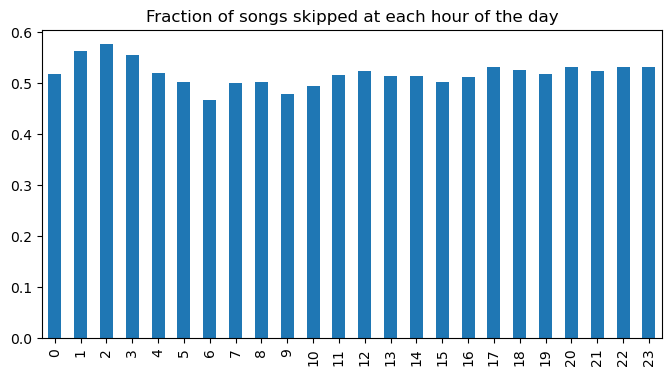

In [100]:
hourly_skipping_df = pd.DataFrame.from_dict(percentage_skipping, orient='index')
hourly_skipping_df.rename(columns={0: 'percentage_skipping_at_hour'}, inplace=True)
hourly_skipping_df.plot(kind='bar', figsize=(8, 4), title='Fraction of songs skipped at each hour of the day', legend=False)

In [57]:
spotify_eda = sesh.drop(columns=[
    'date', 
    'session_id', 
    'track_id'
])
spotify_eda['skipped'] = np.where(spotify_eda['not_skipped']>0, 0, 1)
spotify_eda_pd = spotify_eda
spotify_eda_pd.head()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,1,20,False,False,False,True,0,0,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,0
1,2,20,False,False,False,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,0
2,3,20,False,False,False,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,0
3,4,20,False,False,False,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,0
4,5,20,False,False,False,True,0,1,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,0


In [58]:
print(spotify_eda.session_length.value_counts())

20    101320
11      8272
10      8190
12      7752
13      7111
15      6525
14      6426
19      5966
18      5454
17      5440
16      5424
Name: session_length, dtype: int64


In [59]:
spotify_20 = spotify_eda[spotify_eda['session_length'] == 20]
spotify_20.info()
len(spotify_20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101320 entries, 0 to 167879
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_position                 101320 non-null  int64 
 1   session_length                   101320 non-null  int64 
 2   skip_1                           101320 non-null  bool  
 3   skip_2                           101320 non-null  bool  
 4   skip_3                           101320 non-null  bool  
 5   not_skipped                      101320 non-null  bool  
 6   context_switch                   101320 non-null  int64 
 7   no_pause_before_play             101320 non-null  int64 
 8   short_pause_before_play          101320 non-null  int64 
 9   long_pause_before_play           101320 non-null  int64 
 10  hist_user_behavior_n_seekfwd     101320 non-null  int64 
 11  hist_user_behavior_n_seekback    101320 non-null  int64 
 12  hist_user_behavi

101320

In [60]:
spotify20_3tracks =  spotify_20[(spotify_20[
    'session_position'] == 1) | (spotify_20[
    'session_position'] == 10) | (spotify_20[
    'session_position'] == 20)]
spotify20_3tracks.info()
spotify20_3tracks.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15198 entries, 0 to 167879
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   session_position                 15198 non-null  int64 
 1   session_length                   15198 non-null  int64 
 2   skip_1                           15198 non-null  bool  
 3   skip_2                           15198 non-null  bool  
 4   skip_3                           15198 non-null  bool  
 5   not_skipped                      15198 non-null  bool  
 6   context_switch                   15198 non-null  int64 
 7   no_pause_before_play             15198 non-null  int64 
 8   short_pause_before_play          15198 non-null  int64 
 9   long_pause_before_play           15198 non-null  int64 
 10  hist_user_behavior_n_seekfwd     15198 non-null  int64 
 11  hist_user_behavior_n_seekback    15198 non-null  int64 
 12  hist_user_behavior_is_shuffle  

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,1,20,False,False,False,True,0,0,0,0,0,0,True,16,True,editorial_playlist,trackdone,trackdone,0
9,10,20,True,True,True,False,0,1,0,0,0,0,True,16,True,editorial_playlist,fwdbtn,fwdbtn,1
19,20,20,True,True,True,False,0,1,0,0,0,0,True,16,True,editorial_playlist,fwdbtn,fwdbtn,1
20,1,20,False,True,True,False,0,0,0,0,0,1,True,14,True,user_collection,trackdone,fwdbtn,1
29,10,20,True,True,True,False,0,1,0,0,0,0,True,14,True,user_collection,fwdbtn,backbtn,1


In [61]:
spotify_track1 = spotify20_3tracks[spotify20_3tracks['session_position'] == 1]

# A slice with all of the 10th tracks in each listening session:
spotify_track10 = spotify20_3tracks[spotify20_3tracks['session_position'] == 10]

# A slice with all of the last (20th) track in each listening session:
spotify_track20 = spotify20_3tracks[spotify20_3tracks['session_position'] == 20]

print(len(spotify_track1))
print(len(spotify_track10))
print(len(spotify_track20))

5066
5066
5066


bivariate analysis with `skipped` and other variables, for each of these 3 slices

In [105]:
def plot_side_by_side(series_list, y1, y2, y3, suptitle):
    plt.figure(figsize=(20,8))
    plt.xticks(rotation=45, ha='right')
    plt.suptitle('{}'.format(suptitle))
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1, 3, 1)
    sns.barplot(x=series_list[0], y=y1)
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1, 3, 2)
    sns.barplot(x=series_list[1], y=y2)

    plt.xticks(rotation=45, ha='right')
    plt.subplot(1, 3, 3)
    sns.barplot(x=series_list[2], y=y3) 

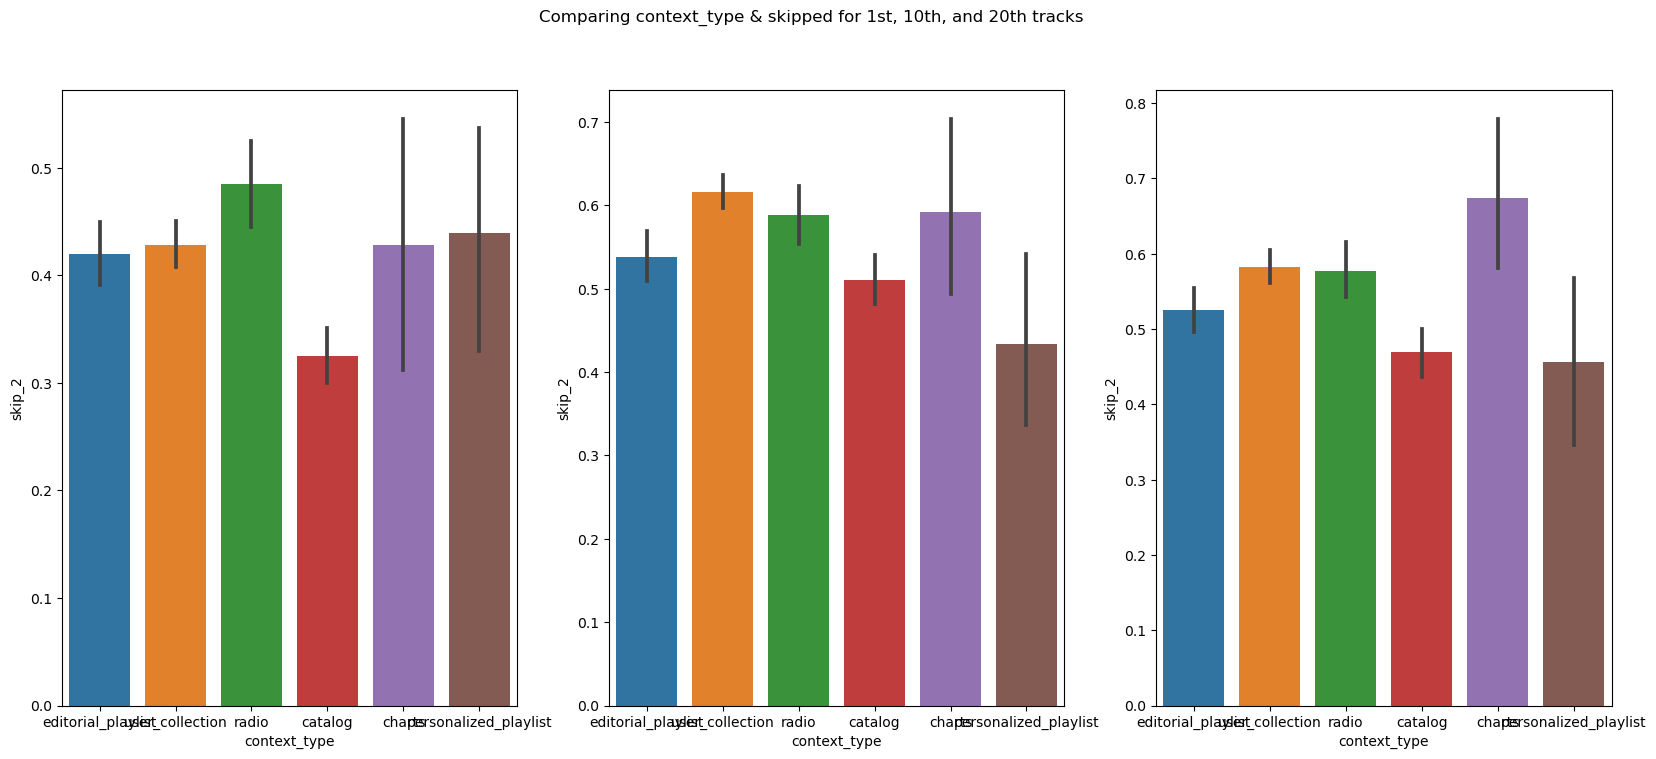

In [101]:
plot_side_by_side(
    [
    spotify_track1['context_type'], 
    spotify_track10['context_type'], 
    spotify_track20['context_type']
], 
    spotify_track1[ 'skip_2'] , 
    spotify_track10['skip_2'], 
    spotify_track20['skip_2'],
    'Comparing context_type & skipped for 1st, 10th, and 20th tracks'
)

## Commentary
for the 1st track in a listening session, it was most common for a track to be skipped if it was from a personalized playlist, and for both the 10th and 20th tracks in a session, it was most common for tracks to be skipped if they were in `charts`

## Comparing `reason_start` 

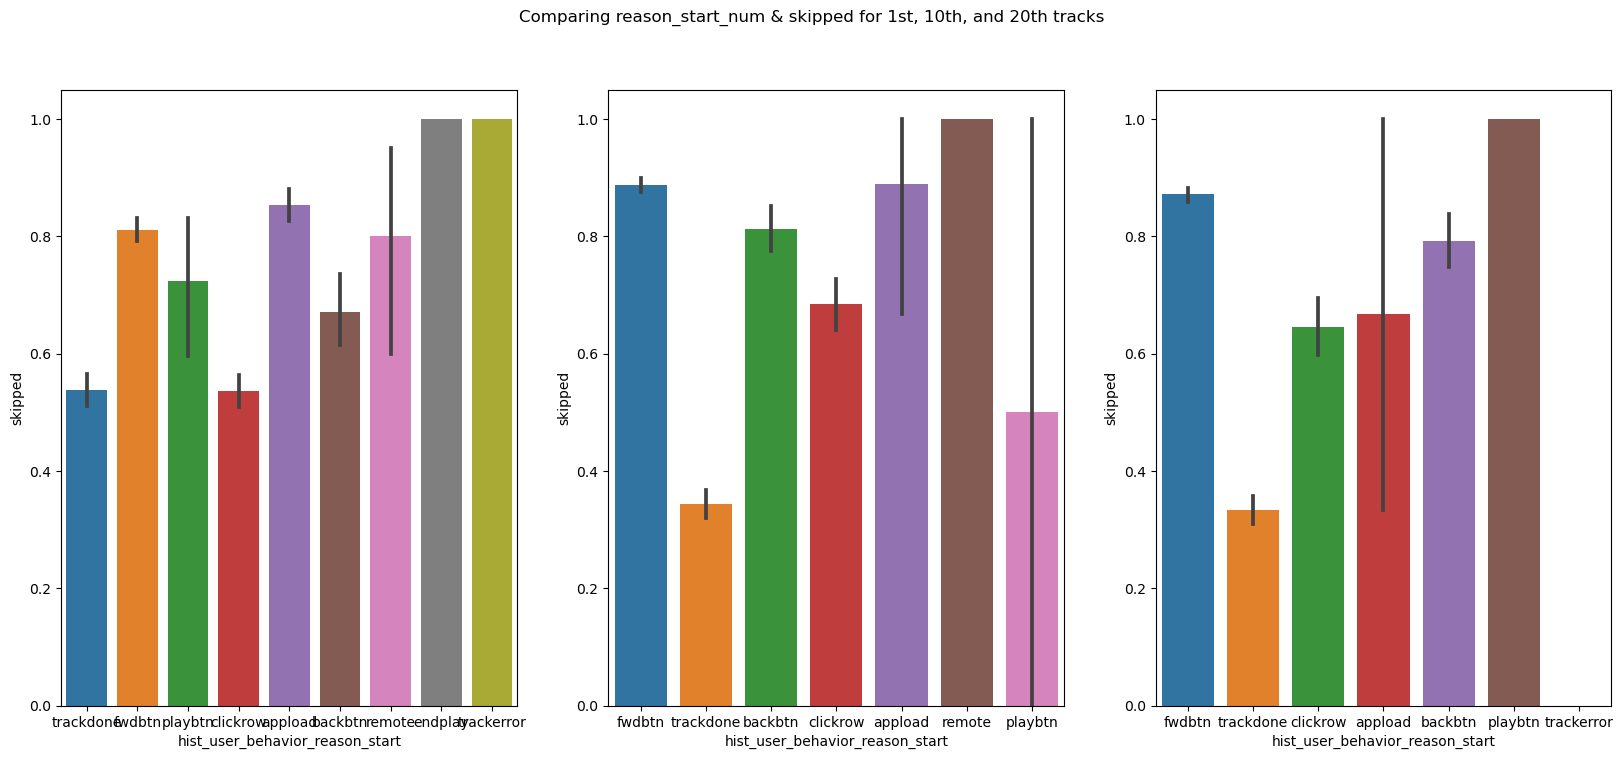

In [106]:
plot_side_by_side(
    [
    spotify_track1[ 'hist_user_behavior_reason_start'] , 
    spotify_track10['hist_user_behavior_reason_start'], 
    spotify_track20['hist_user_behavior_reason_start']
], 
    spotify_track1[ 'skipped'] , 
    spotify_track10['skipped'], 
    spotify_track20['skipped'],
    'Comparing reason_start_num & skipped for 1st, 10th, and 20th tracks'
)